Ознакомительный нотбук со всеми методами, которые я выучил, знаю, с пояснениями и примерами. В разделе Free решение всяких задачек

In [2]:
# data
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import KFold, LeavePOut, LeaveOneOut, \
    ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, GroupKFold, \
    train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Decision tree print
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus


### Pandas tricks

#### Time Series  - классная штука, если нужно работать с датированными данными

Важно правильно импортнуть данные с датой в индексе и parse_dates=True  
А потом можно:
- Брать срезы по датам, месяцам, годам
- Смотреть какие дни недели в выборке, дни года, номера недели и тд
- Перегрупироввывать данные для другого периода, как большего так и меньшего (resample)
- Сглаживать графики путем нахождения среднего по окну
    - Обычное окно. Размер задается параметром (rolling)
    - Експоненциально изменяющееся окно. Для первого значения размер окна 1, для второго 2 и тд. (expanding)
    - Експоненциально взвешенное окно. Размер задается экспоненциально и каждое более далекое значение имеет более низкий вес ()

In [65]:
df = pd.read_csv('stepik_mashine_learning_course/data/amzn_stock.csv', index_col='Date', parse_dates=True)

In [66]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [71]:
df['2017'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,757.92,758.76,747.70,753.67,3521066
2017-01-04,758.39,759.68,754.20,757.18,2510526
2017-01-05,761.55,782.40,760.26,780.45,5830068
2017-01-06,782.36,799.44,778.48,795.99,5986234
2017-01-09,798.00,801.77,791.77,796.92,3446109


In [73]:
df['2017-03': '2018'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-03-01,853.05,854.83,849.01,853.08,2760083
2017-03-02,853.08,854.82,847.28,848.91,2132098
2017-03-03,847.20,851.98,846.27,849.88,1951575
2017-03-06,845.23,848.49,841.12,846.61,2610370
2017-03-07,845.48,848.46,843.75,846.02,2247554


In [121]:
df.index.weekday_name.value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

In [128]:
df.index.month_name().value_counts()

March        176
June         172
May          169
April        164
January      160
July         158
August       155
February     154
October      152
December     149
September    144
November     143
Name: Date, dtype: int64

In [79]:
df.resample('2h').asfreq().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.9,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN


In [80]:
df.resample('1y').mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-12-31,138.971036,140.926853,137.019761,139.169602,7.288140e+06
2011-12-31,196.658413,199.444762,193.525516,196.663849,5.810698e+06
2012-12-31,220.011040,222.679440,217.588840,220.303680,4.200934e+06
2013-12-31,297.866270,300.925913,294.656587,298.032222,2.969756e+06
2014-12-31,332.799841,336.317460,328.545476,332.550913,4.088199e+06


In [86]:
df.rolling(3, min_periods=2).mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06


In [116]:
df.expanding(min_periods=1).count().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,1.0,1.0,1.0,1.0,1.0
2010-01-05,2.0,2.0,2.0,2.0,2.0
2010-01-06,3.0,3.0,3.0,3.0,3.0
2010-01-07,4.0,4.0,4.0,4.0,4.0
2010-01-08,5.0,5.0,5.0,5.0,5.0


In [94]:
df.ewm(alpha=0.7).mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06


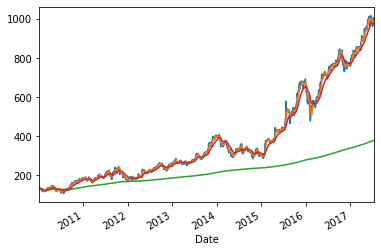

In [114]:
df.Open.plot()
df.Open.rolling(10).mean().plot()
df.Open.expanding().mean().plot()
df.Open.ewm(alpha=0.05).mean().plot()

#### Измерение по скорости операций поиска среднего

In [54]:
time_iris_df = pd.read_csv(r'stepik_mashine_learning_course/data/irises/iris.csv')

In [55]:
%%timeit
time_iris_df.mean(axis=0)

350 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [57]:
%%timeit
time_iris_df.apply('mean')

654 µs ± 55.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
%%timeit
time_iris_df.apply(np.mean)

1.9 ms ± 44.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [58]:
%%timeit
time_iris_df.describe().loc['mean']

19.3 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### value_counts

In [35]:
df.sex.value_counts()

1    169
0     69
Name: sex, dtype: int64

In [34]:
df.groupby('sex').size()

sex
0     69
1    169
dtype: int64

#### pivot

In [20]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
                    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                    'baz': [1, 2, 3, 4, 5, 6],
                    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [21]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


#### melt

Обратное действие к pivot. "Вытягиваем вдлинну" датасет, уменьшая количество столбцов. Для того, чтобы нарисовать график нужно делать melt, чтобы потом группировать по переменной.

In [24]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [27]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'], var_name='BC_column', value_name='BC_value')

,A,BC_column,BC_value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


#### query

In [55]:
# Метод query. @ для экранирования переменной
writing_score_comp = 96
df.query("gender == 'female' & writing_score > @writing_score_comp").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
106,female,group D,master's degree,standard,none,87,100,100
110,female,group D,associate's degree,free/reduced,completed,77,89,98
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
377,female,group D,master's degree,free/reduced,completed,85,95,100
403,female,group D,high school,standard,completed,88,99,100
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97


#### describe

In [44]:
# describe содержит среднее, дисперсию и много инфы
df[df.lunch == 'standard'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


#### filter

In [62]:
# Отбор всех колонок, содержащих подстроку 'score'
df.filter(like='score', axis=1).head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


### Визуализация

In [50]:
folder = 'stepik_mashine_learning_course'
df = pd.read_csv(f'{folder}/data/StudentsPerformance.csv')
salary_df = pd.read_csv(f'{folder}/data/income.csv')
dota2_df = pd.read_csv(f'{folder}/data/dota_hero_stats.csv')
genome_df = pd.read_csv(f'{folder}/data/genome_matrix.csv')
iris_df = pd.read_csv(f'{folder}/data/irises/iris.csv')

df.rename(columns={col: col.replace(' ', '_') for col in df.columns}, inplace=True)

#### Dots distribution

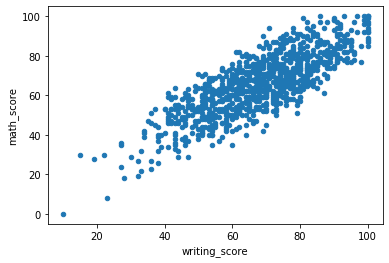

In [7]:
df.plot.scatter(x='writing_score', y='math_score')

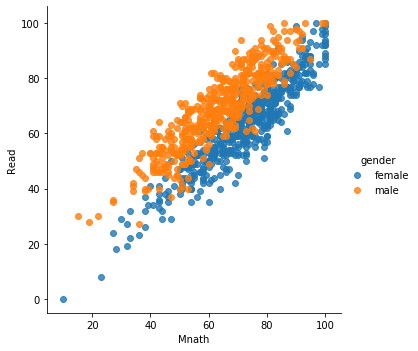

In [11]:
pl = sns.lmplot(x='writing_score', y='math_score', hue='gender', data=df, fit_reg=False)
pl.set_xlabels('Mnath')
pl.set_ylabels('Read')

#### Lineplot variations

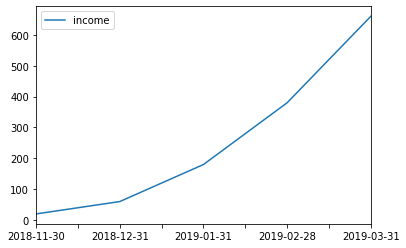

In [17]:
salary_df.plot(kind='line')

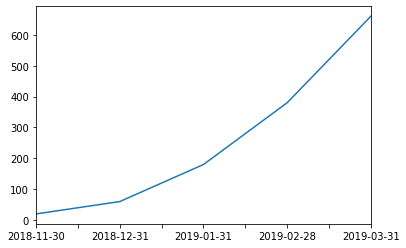

In [18]:
salary_df.income.plot()

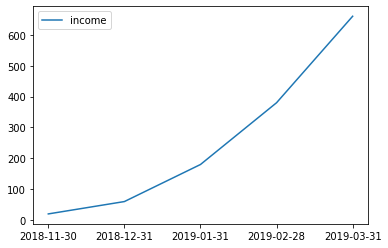

In [20]:
sns.lineplot(data=salary_df)

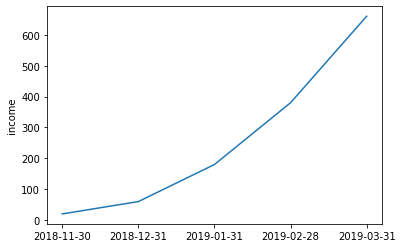

In [22]:
sns.lineplot(x=salary_df.index, y=salary_df.income)

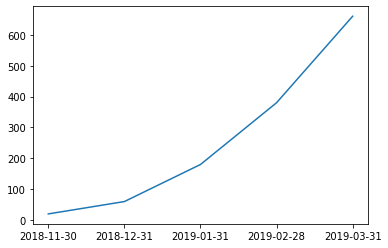

In [23]:
plt.plot(salary_df.index, salary_df.income)

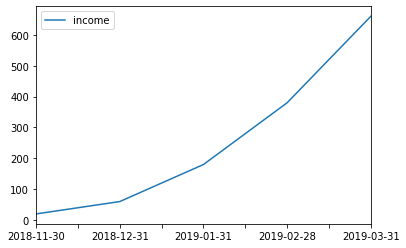

In [24]:
salary_df.plot()

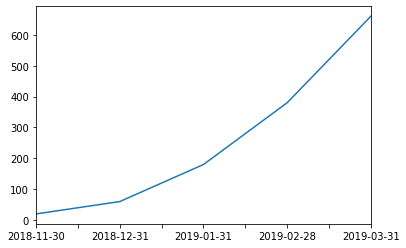

In [25]:
salary_df.income.plot()

#### lmplot

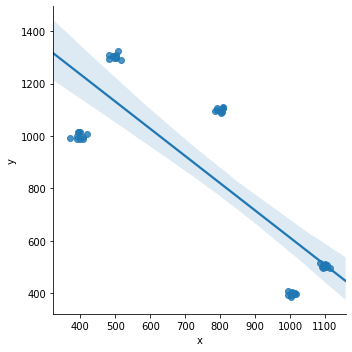

In [74]:
# Два аналогичных чтения разной умности написания
with open('data/dataset_209770_6.txt') as f:
    inputs = [(float(v.split()[0]), float(v.split()[1])) for v in f.read().split('\n') if v != '' and 'x' not in v]
xy_df = pd.DataFrame.from_dict({'x': [i[0] for i in inputs], 'y': [i[1] for i in inputs]})


xy_df = pd.read_csv('data/dataset_209770_6.txt', sep=' ')
sns.lmplot(x='x', y='y', data=xy_df)



#### HeatMap

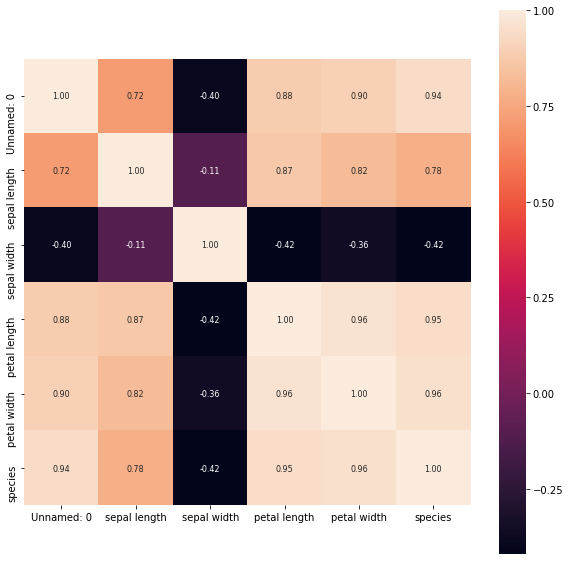

In [51]:
corr = iris_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cbar=True, annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 8},
            yticklabels=corr.columns.values, xticklabels=corr.columns.values)

#### Simple Hists

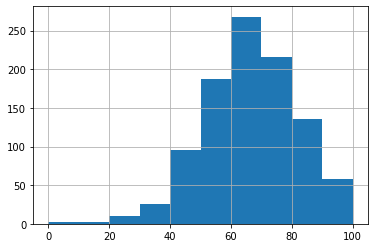

In [5]:
df.math_score.hist()

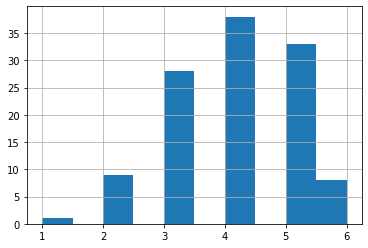

In [91]:
dota2_df['rolse_num'] = dota2_df.roles.apply(lambda x: x.count(',') + 1)
dota2_df.rolse_num.hist()

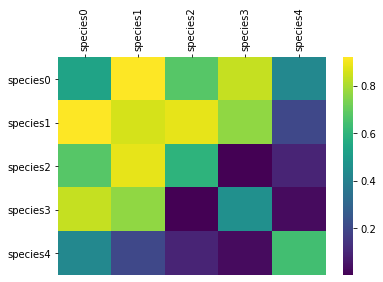

In [73]:
g = sns.heatmap(genome_df, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

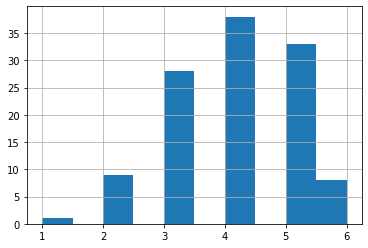

In [90]:
dota2_df.rolse_num.hist()

In [86]:
dota2_df.rolse_num.mean()

42.46153846153846

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d117828>,
      dtype=object)

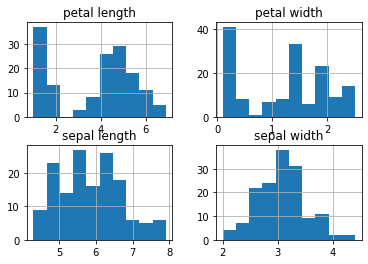

In [134]:
iris_df.iloc[:, 1:-1].hist()

#### Attributes distribution

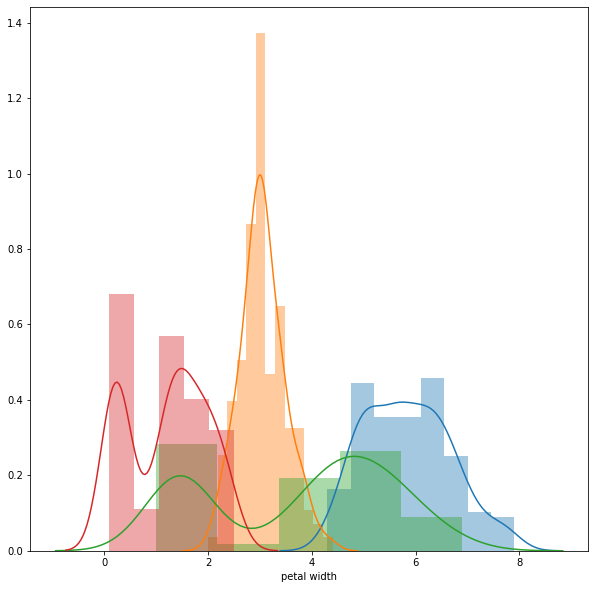

In [126]:
# pt = sns.kdeplot(iris_df)
plt.figure(figsize=(10,10))
good_columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
for col in good_columns:
    sns.distplot(iris_df[col])


In [118]:
iris_df.describe()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


#### Pairplot

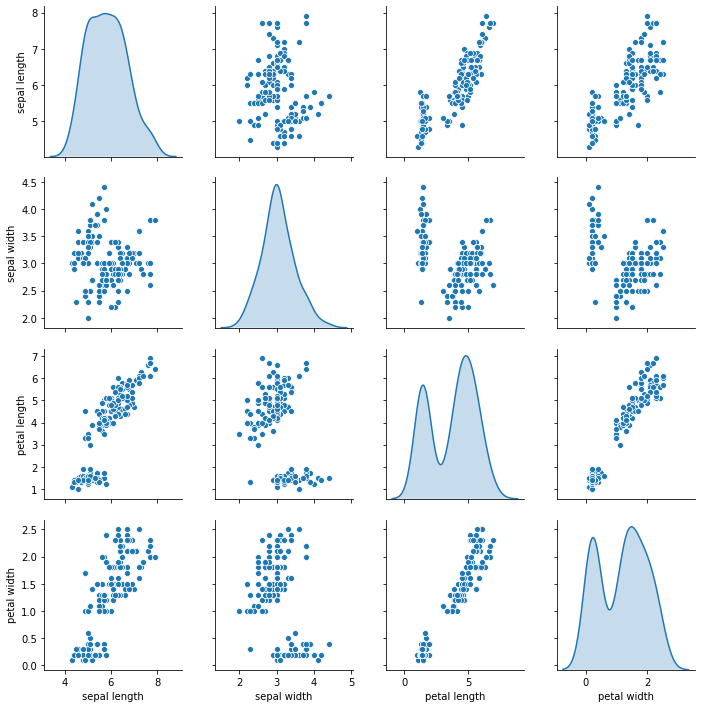

In [128]:
sns.pairplot(iris_df,  vars=iris_df.columns[1:-1], diag_kind='kde')

#### ViolinPlot

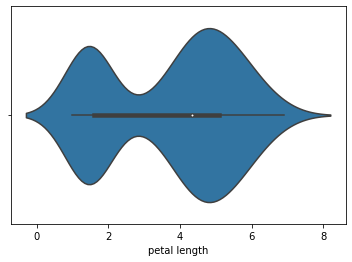

In [129]:
sns.violinplot(iris_df['petal length'])

In [130]:
iris_df['petal length'].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length, dtype: float64

#### Графическое изображение дерева принятия решений

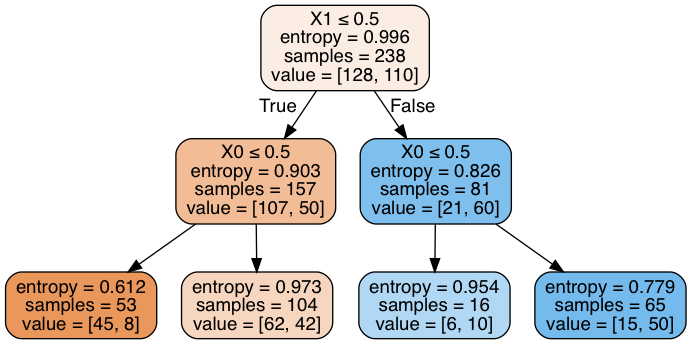

In [30]:
df = pd.read_csv(f'{folder}/data/train_data_tree.csv')
X = df[['sex', 'exang']]
y = df[['num']]

clf = DecisionTreeClassifier(criterion='entropy', random_state=2)
clf.fit(X, y)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Методы разбиения множеств на train / test для Cross-Validation

In [69]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([1, 2, 3, 4, 5])

#### LeavePOut

Получаем наборы индексов TRAIN / TEST в пропорции, которую передали в скобках. Перебираем все возможные комбинации без пересечений. Для больших размеров датасетов лучше не использовать

In [23]:
lpo = LeavePOut(2)
list(lpo.split(X))

[(array([2, 3, 4]), array([0, 1])),
 (array([1, 3, 4]), array([0, 2])),
 (array([1, 2, 4]), array([0, 3])),
 (array([1, 2, 3]), array([0, 4])),
 (array([0, 3, 4]), array([1, 2])),
 (array([0, 2, 4]), array([1, 3])),
 (array([0, 2, 3]), array([1, 4])),
 (array([0, 1, 4]), array([2, 3])),
 (array([0, 1, 3]), array([2, 4])),
 (array([0, 1, 2]), array([3, 4]))]

#### LeaveOne

Стратегия, которая позволяет оставить каждый объект в тесте один раз, таким образом тестовая выборка всегда состоит из одного объекта и каждый объект из набора данных один раз присутствует в тесте. LeaveOneOut() - тоже самое, что KFold(n_splits=n) и LeavePOut(p=1)

In [46]:
lpo = LeaveOneOut()
list(lpo.split(X))

[(array([1, 2, 3, 4]), array([0])),
 (array([0, 2, 3, 4]), array([1])),
 (array([0, 1, 3, 4]), array([2])),
 (array([0, 1, 2, 4]), array([3])),
 (array([0, 1, 2, 3]), array([4]))]

#### ShuffleSplit

Рандомно генерируем перестановки для получения TRAIN / TEST индексов. Не гарантирует, что все перестановки будут уникальны. Хорошо использовать для больших датасетов. n_splits - количество наборов

In [16]:
rs = ShuffleSplit(n_splits=5, test_size=0.25)
list(rs.split(X))

[(array([0, 3, 4]), array([2, 1])),
 (array([2, 4, 3]), array([1, 0])),
 (array([4, 3, 2]), array([1, 0])),
 (array([0, 4, 2]), array([3, 1])),
 (array([2, 4, 0]), array([1, 3]))]

#### KFold

Получает TRAIN / TEST индексы. Разбивает датасет на k последовательных фолдов без перемешки (по умолчанию). Каждая из k фолдов единожды используется для теста, когда другие k-1 используются для обучения.

In [79]:
kf = KFold(n_splits=4, shuffle=True)
list(kf.split(X))

[(array([1, 2, 4]), array([0, 3])),
 (array([0, 1, 3, 4]), array([2])),
 (array([0, 1, 2, 3]), array([4])),
 (array([0, 2, 3, 4]), array([1]))]

#### GroupKFold

Одинаковые группы не встретятся в двух разных фолдах (число раздичных групп должно быть как минимум равняться числу фолдов). Фолды приблизительно сбалансированы в том смысле, что количество отдельных групп приблизительно одинаково в каждом фолде.

#### StratifiedKFold

Разновидность KFold, которая возвращает многослойные фолды. Позволяет сохранять соотношение классов в обучающих и тестовых подвыборках. 

In [70]:
y = np.array([0, 0, 1, 1, 1])
skf = StratifiedKFold(n_splits=3)
list(skf.split(X, y))

c:\users\altuhov.n.a\pycharmprojects\kaggle_tasks\venv\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[(array([1, 3, 4]), array([0, 2])),
 (array([0, 2, 4]), array([1, 3])),
 (array([0, 1, 2, 3]), array([4]))]

#### train_test_split

Разбивает датасет рандомно на две части в заданной пропорции. На выходе по ОДНОМУ train и test датасету

In [78]:
# X_train, X_test, y_train, y_test = 
train_test_split(X, y, test_size=0.25)

[array([[ 1,  2],
        [ 7,  8],
        [ 9, 10]]), array([[5, 6],
        [3, 4]]), array([0, 1, 1]), array([1, 0])]

### Cross-Validation

#### GridSearchCV

Ищет оптимальное сочетание параметров дерева. Параметр cv принимает:
    int значения - количество фолдов, на которые разбивается датасет и тестируется на всех по очереди (по умолч. 3)
    Итератор, который возвращает индексы разбитого датасета.

In [101]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier()
search = GridSearchCV(estimator=clf, 
                      param_grid={'min_samples_leaf': range(1, 10),
                                'min_samples_split': range(2, 10),
                                'max_depth': range(1, 10)},
                      cv=5)
search.fit(X, y)
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [102]:
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [103]:
search.best_score_

0.9733333333333334

In [126]:
accuracy_score(search.predict(X), y)

0.9733333333333334

#### RandomizedSearchCV

Бывают случаи, когда полный перебор слишком сложен, и для этого есть RandomizedSearchCV! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

In [119]:
rnd_search = RandomizedSearchCV(estimator=clf, 
                      param_distributions={'min_samples_leaf': range(1, 10),
                                'min_samples_split': range(2, 10),
                                'max_depth': range(1, 10)},
                      n_iter=8,
                      cv=5)
rnd_search.fit(X, y)
rnd_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [120]:
rnd_search.best_params_

{'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 5}

In [121]:
rnd_search.best_score_

0.9666666666666667

### Модели

#### DecisionTreeClassifier

Дерево решений  
Параметры:  
- __criterion__ функция для вычисления качества разбиения ("gini" / "entropy")
- __splitter__ Стратегия выбора разбиения на каждой вершине ("best" / "random" (= random_best))
- __max_depth__ Максимальная глубина роста дерева
- __min_samples_split__ Минимальное количество сэмплов для разбиения
- __min_samples_leaf__ Минимальное количество сэмплов в вершине после разбиения
- __min_weight_fraction_leaf__ Непонятный параметр, связанный с ВЕСОМ
- __max_features__ Число фичей, которые учавствуют в конкурсе на очередное разбиение
- __max_leaf_nodes__ Максимальное число листов. Делятся только лучшие вершины по критерию уменьшения неразберихи
- __min_impurity_decrease__ Вершина будет разделена, если это приведёт у уменьшению пеопределённости на величину, не меньшую чем указана в параметре
- __min_impurity_split__ Порог для прекращения разбиения в случае, если неопределённость меньше указанного значения
- __class_weight__ Словарь или массив словарей, каждое поле получает определённый вес (по умолчанию - 1)
- __presort__ ПРЕСортировка данных для ускорнения разделения вершин при обучении. Тем не менее, на больших датасэтах время обучения возрастёт
- __random_state__

In [120]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [121]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [123]:
y = iris_df.target
X = iris_df.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66, random_state=3)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9393939393939394

#### RandomForestClassifier

Дерево решений  
Параметры DecisionTreeClassifier, параметры самого леса:  
- __n_estimators__ Количество деревьев в лесу (по умолчанию 10)
- __bootstrap__ Используются ли начальные данные для построения дерева, если нет, то  все данные используются для построения каждого дерева (True / False)
- __oob_score__ 
- __n_jobs__ Количество процессов для запуска в параллель
- __verbose__ Для контроля "многословия" во время обучения и предсказания (int)
- __warm_stat__ Если True, то переиспользуется решение предыдущего обучения для обучения нового леса. Иначе лес обучается заново


In [102]:
# from sklearn.datasets import load_iris
# iris = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=3)

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

c:\users\altuhov.n.a\pycharmprojects\kaggle_tasks\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9494949494949495

Оценка "важности переменных для формирования ответа"

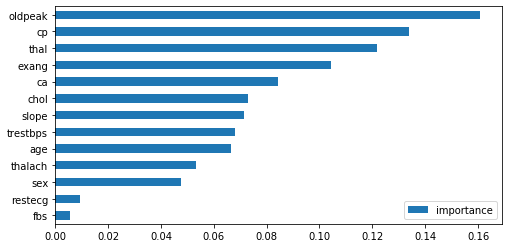

In [160]:
df = pd.read_csv(r'stepik_mashine_learning_course/data/heart.csv')

X = df.drop('target', axis=1)
y = df.target
clf_rf = RandomForestClassifier(10, max_depth=5)
clf_rf.fit(X, y)

imp = pd.DataFrame(clf_rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(8, 4))

In [161]:
imp.sort_values('importance', ascending=False)

,importance
oldpeak,0.160861
cp,0.133689
thal,0.121905
exang,0.104357
ca,0.084266
chol,0.072941
slope,0.071560
trestbps,0.068019
age,0.066518
thalach,0.053154


#### Кластеризация

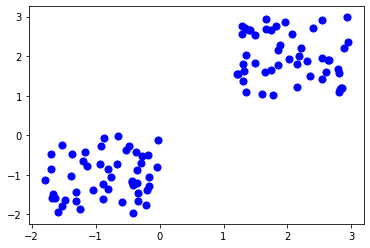

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

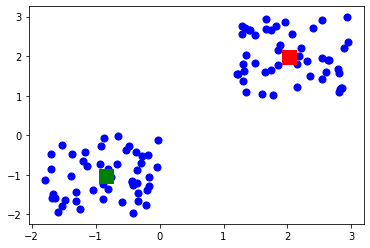

In [3]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)
centers = Kmean.cluster_centers_
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(*centers[0], s=200, c='g', marker='s')
plt.scatter(*centers[1], s=200, c='r', marker='s')
plt.show()

### Метрики оценки качества предсказаний

#### confusion_matrix

Существуют различные метрики оценки качества предсказаний, которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative, соответствующих тому какой класс был присвоен наблюдениям каждого из классов.
В sklearn можно её удобно получить с помощью функции confusion_matrix.

С помощью переменной sample_weight можно задавать веса для Precision и Recall.

In [46]:
y_true = ["cat", "ant", "cat", "cat", "ant", "cat", 'ant']
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat", 'ant']
cm = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=["ant", "cat"])

In [47]:
cm

array([[3, 0],
       [1, 3]])

In [48]:
list(cm.ravel())


[3, 0, 1, 3]

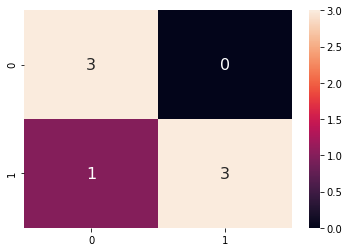

In [49]:
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g')

#### accuracy_score

Отношение количества совпавших ответов к общему количеству. Если normalize=False, то предсказывает общее количество правильных ответов. С помощью переменной sample_weight можно задавать веса разным элементам

In [9]:
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.5

In [12]:
accuracy_score(y_true, y_pred, normalize=False)

2

In [19]:
accuracy_score(y_true, y_pred, sample_weight=[1, 0.5, 1, 1])

0.5714285714285714

### Разные трюки с Kaggle

#### Функция вывода информации о колонках DF

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

#### Функция для уменьшения веса DF

In [ ]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

#### Функция подсчёта выбросов в DF

In [ ]:
def CalcOutliers(df_num): 

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Total outlier observations: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

### Free